In [47]:
#ライブラリのインポート
import pandas as pd
import seaborn as sns

#データの準備
df = pd.read_csv('/content/タイタニック_学習データ.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
#課題１：変数値の確認
#カテゴリ変数の場合は各変数がどのような値を取るのか確認してみましょう。（df.drop_duplicates('カラム名') or df.value_counts('カラム名')を使用）
print(df.drop_duplicates('Cabin'))
print(df.value_counts('Cabin'))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
..           ...       ...     ...   
857          858         1       1   
867          868         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
..                                                 ...     ...   ... 

In [49]:
#課題１：変数値の確認
#数値変数の場合は最小値、最大値、平均などを確認しましょう。（df.describe()を使用）
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
#課題２：null値の穴埋め
#nullがある変数がないか確認する。
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

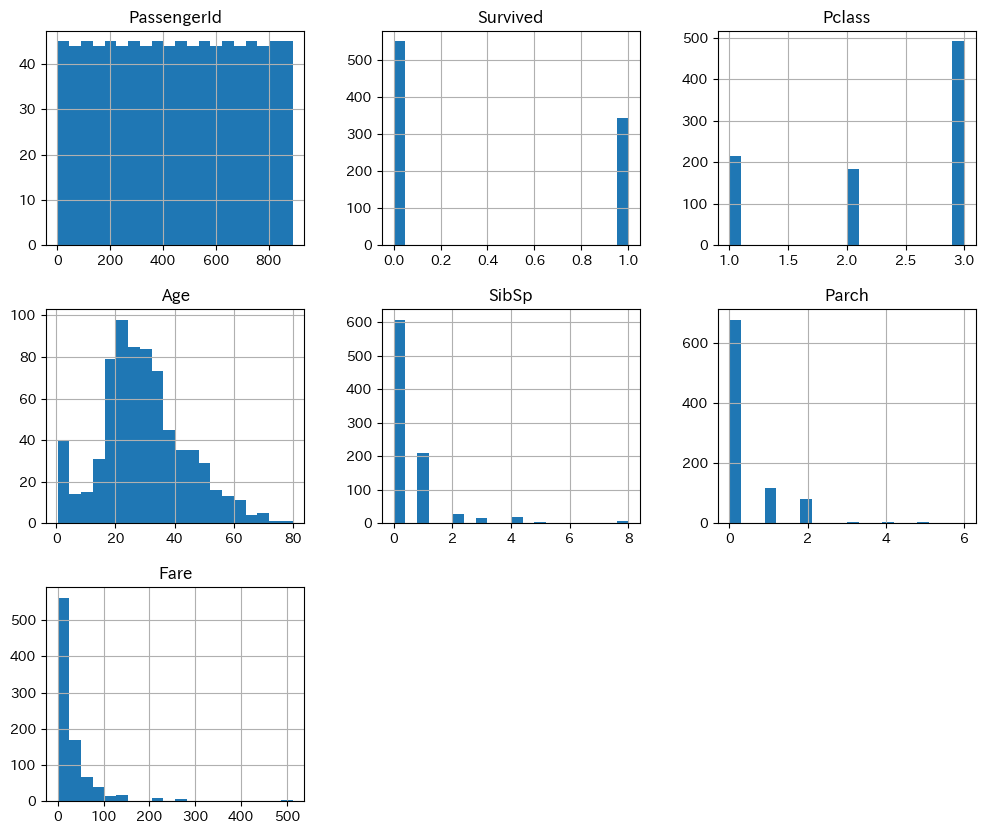

In [51]:
!pip install japanize-matplotlib
import japanize_matplotlib
df.hist(bins=20, figsize=(12, 10))

In [52]:
#課題２：null値の穴埋め
#nullはAge,Cabin,Embarked
#0で穴埋めすべきか。平均値で穴埋めすべきか（df.fillna()を使用）

#Ageは平均値で穴埋め
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [53]:
#課題３：新しい特徴量を作ってみましょう。
#目的変数に関係がありそうな新しい特徴量を作成
#タイタニックのデータセットを使って、乗客が生存したか、死亡したかを判定するモデルを作成します。（目的変数：Survived）

#使えそうな変数を選定（1人で乗船した人はSibSp, Parchカラムから割り出せるのではないか（SibSp, Parchが0であれば単身で乗船））
print(df['SibSp'].unique())
print(df['Parch'].unique())

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


In [54]:
#タイタニック号の沈没で生き残った人はどのような人か想像します。（例：1人で乗船した人（家族連れでない人）は生き残ってなさそう）
#データフレームにカラムを追加（df['alone_flg'] = df['SibSp'] + df['Parch'] == 0）
df['alone_flg'] = df['SibSp'] + df['Parch'] == 0
df['alone_flg'] = (df['alone_flg'] == 0).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone_flg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [55]:
#alone_flgの生存率
#家族連れの生存確率は５割
df.groupby('alone_flg')['Survived'].mean()


,Survived
alone_flg,
0,0.303538
1,0.505650


In [56]:
#age18以下のalone_flgがどれほど存在するか
df[(df['Age'] <= 18) & (df['alone_flg'] == 0)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone_flg
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,0
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,0
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C,0
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,0
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S,0
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q,0
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,0
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,0
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,0


In [57]:
#
df['age'] = df['Cabin'].notna().astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone_flg,age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1


In [58]:
#cabinがnullであれば0、nullでなかったら１
df['cabin_flg'] = df['Cabin'].notna().astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone_flg,age,cabin_flg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1,1


In [59]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone_flg,age,cabin_flg
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,1,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,0,1,1


In [60]:
df['Embarked'] = df['Embarked'].fillna('S')

In [61]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,alone_flg,age,cabin_flg,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,1,0,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,1,1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,1,1,1,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0,0,0,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,1,1,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,1,0,0,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,1,1,False,False


In [62]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'alone_flg', 'age', 'cabin_flg',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [63]:
#目的変数YはSurvived
#説明変数Xはalone_flg
#学習データとテストデータに分割
X = df[['alone_flg','Pclass','cabin_flg','Sex', 'Age','Fare','Embarked_Q','Embarked_S']].astype(float).to_numpy()
y = df['Survived'].to_numpy()

#train_test_split関数をインポートし、7:3に学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#分割後のデータ数
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [64]:
#学習データのスケーリングはscikit-learnのStandardScaler()を使用
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [65]:
df_X_train = pd.DataFrame(X_train)
df_X_train.head()

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,1.0,51.000000,26.5500,0.0,1.0
1,1.0,1.0,1.0,0.0,49.000000,76.7292,0.0,0.0
2,1.0,3.0,0.0,1.0,1.000000,46.9000,0.0,1.0
3,1.0,1.0,1.0,1.0,54.000000,77.2875,0.0,1.0
4,1.0,3.0,0.0,0.0,29.699118,14.4583,0.0,0.0


In [66]:
df_X_train_scaled = pd.DataFrame(X_train_scaled)
df_X_train_scaled.head()

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,1.0,51.000000,26.5500,0.0,1.0
1,1.0,1.0,1.0,0.0,49.000000,76.7292,0.0,0.0
2,1.0,3.0,0.0,1.0,1.000000,46.9000,0.0,1.0
3,1.0,1.0,1.0,1.0,54.000000,77.2875,0.0,1.0
4,1.0,3.0,0.0,0.0,29.699118,14.4583,0.0,0.0


In [67]:
X_test_scaled  = scaler.transform(X_test)

df_X_test = pd.DataFrame(X_test)
df_X_test.head()

,0,1,2,3,4,5,6,7
0,0.0,3.0,0.0,1.0,29.699118,14.4583,0.0,0.0
1,0.0,3.0,0.0,1.0,29.699118,7.5500,0.0,1.0
2,1.0,3.0,0.0,1.0,7.000000,29.1250,1.0,0.0
3,1.0,1.0,1.0,0.0,29.699118,146.5208,0.0,0.0
4,1.0,3.0,0.0,0.0,29.000000,15.2458,0.0,0.0


In [68]:
df_X_test_scaled = pd.DataFrame(X_test_scaled)
df_X_test_scaled.head()

,0,1,2,3,4,5,6,7
0,-0.807787,0.848448,-0.568082,0.725921,-0.013392,-0.373297,-0.314270,-1.672956
1,-0.807787,0.848448,-0.568082,0.725921,-0.013392,-0.516566,-0.314270,0.597744
2,1.237950,0.848448,-0.568082,0.725921,-1.758199,-0.069128,3.181981,-1.672956
3,1.237950,-1.532556,1.760308,-1.377561,-0.013392,2.365514,-0.314270,-1.672956
4,1.237950,0.848448,-0.568082,-1.377561,-0.067131,-0.356965,-0.314270,-1.672956


In [69]:
df_X_test_scaled.describe()

,0,1,2,3,4,5,6,7
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.016614,0.084394,-0.116305,-0.051112,-0.044524,-0.017517,-0.040310,-0.088549
std,1.005307,0.981853,0.922489,1.017130,0.997376,1.098529,0.941321,1.044720
min,-0.807787,-1.532556,-0.568082,-1.377561,-2.263982,-0.673144,-0.314270,-1.672956
25%,-0.807787,-0.342054,-0.568082,-1.377561,-0.605198,-0.509395,-0.314270,-1.672956
50%,-0.807787,0.848448,-0.568082,0.725921,-0.013392,-0.403540,-0.314270,0.597744
75%,1.237950,0.848448,-0.568082,0.725921,0.240336,-0.066147,-0.314270,0.597744
max,1.237950,0.848448,1.760308,0.725921,3.122838,9.951923,3.181981,0.597744


In [70]:
#tensorflowをインポート
import tensorflow as tf

#分割
from sklearn.model_selection import train_test_split


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [71]:
#ニューラルネットワークの構造を定義
#Sequential, Flatten, Denseをインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

#各層のノード数と活性化関数を定義
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#定義したニューラルネットワークをテキスト出力
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
#損失関数、最適化方法、評価指標の設定
#kerasのSequential, Denseを使用
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

#model.compileで最適化手法と損失関数を設定
#それぞれadamとbinary_crossentropyを使う
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#model.fitでハイパーパラメータを決定
#エポック数、バッチサイズ、validation_splitを自由に設定
model.fit(X_train_scaled, y_train, batch_size=32, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4974 - loss: 2.0423
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5653 - loss: 2.0173
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6015 - loss: 1.3607
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5859 - loss: 1.1811
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.1325


In [74]:
#Sequentialクラスのevaluationメソッドで評価
model.evaluate(X_test_scaled, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7201 - loss: 0.6503


[0.6513071060180664, 0.7089552283287048]

In [77]:
#予測
model.predict(X_train_scaled)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[0.4387195 ],
       [0.9493749 ],
       [0.82895124],
       [0.9574456 ],
       [0.4887221 ],
       [0.7401497 ],
       [0.9996078 ],
       [0.37693977],
       [0.25040448],
       [0.30933714],
       [0.25566253],
       [0.2709771 ],
       [0.29758158],
       [0.4423103 ],
       [0.8185237 ],
       [0.49153483],
       [0.0301107 ],
       [0.33344054],
       [0.4489631 ],
       [0.670068  ],
       [0.11193227],
       [0.8811343 ],
       [0.3809874 ],
       [0.50253063],
       [0.59734815],
       [0.7809707 ],
       [0.47291744],
       [0.31075904],
       [0.27672443],
       [0.4625168 ],
       [0.49870396],
       [0.30908757],
       [0.8949732 ],
       [0.36959958],
       [0.5412255 ],
       [0.7371349 ],
       [0.7615249 ],
       [0.25536224],
       [0.46438405],
       [0.7284116 ],
       [0.11310028],
       [0.29125813],
       [0.29099205],
       [0.6162127 ],
       [0.645262  ],
       [0.24785379],
       [0.33447942],
       [0.626